## Diabetes Prediction using Random Forest, KNN, Neural Network 
#### -Shailaja S

### Source

https://www.kaggle.com/kredy10/simple-neural-network-for-diabetes-prediction/data?select=diabetes.csv

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [2]:
# Displaying confusion matrix
def plot_CM(actuals,predicts) :
    target_name = ["diabetes","normal"]
    pl_cm = confusion_matrix(actuals,predicts)
    disp =ConfusionMatrixDisplay(pl_cm,display_labels = target_name)
    disp.plot(cmap = "Blues")
    plt.grid(False)
    plt.show()

#### Load the diabetes data

In [3]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

There are values '0' for Blood pressue, Skinthinkness Insulin.
Let me check in detail 

In [7]:
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols :
    print(f'{col}:{len(df.loc[(df[col] == 0)])}')

Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0


* DiabetesPedigreeFunction and Age does not have Value 0
* Insulin has 374 rows, may be Pateints may not have taken Insulin
* Other feature needed be treated for 0 values, as they can not have 0.

In [8]:
# KNN classifier to replace 0 with nearest neighbour
from sklearn.impute import KNNImputer
def impute0(df):
    df_0 = df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['BMI'] == 0)]
    
    imputer = KNNImputer(missing_values=0)
    impute_values = imputer.fit_transform(df_0[['Glucose', 'BloodPressure','SkinThickness', 'BMI']]).tolist()
    impute_indexes = df_0.index.tolist()

    for index, value in zip(impute_indexes, impute_values):
        df.loc[index, ['Glucose', 'BloodPressure','SkinThickness', 'BMI']] = value
        
    return df

In [9]:
# call the imputer to fill 0 used KNN classifier to impute
diabetes_data = impute0(df)

In [10]:
diabetes_data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age  Outcome
0            57.0     60.0           29.6           0        21.70  0.735                     67   0          1
             67.0     76.0           30.2           0        45.30  0.194                     46   0          1
5            104.0    74.0           30.2           0        28.80  0.153                     48   0          1
             105.0    72.0           29.0           325      36.90  0.159                     28   0          1
             106.0    82.0           30.0           0        39.50  0.286                     38   0          1
                                                                                                             ..
2            84.0     71.0           26.8           0        28.04  0.304                     21   0          1
             85.0     65.0           30.2           0        39.60  0.930                     27   0         

In [11]:
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols :
    print(f'{col}:{len(df.loc[(df[col] == 0)])}')

Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:374
BMI:0
DiabetesPedigreeFunction:0
Age:0


In [12]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

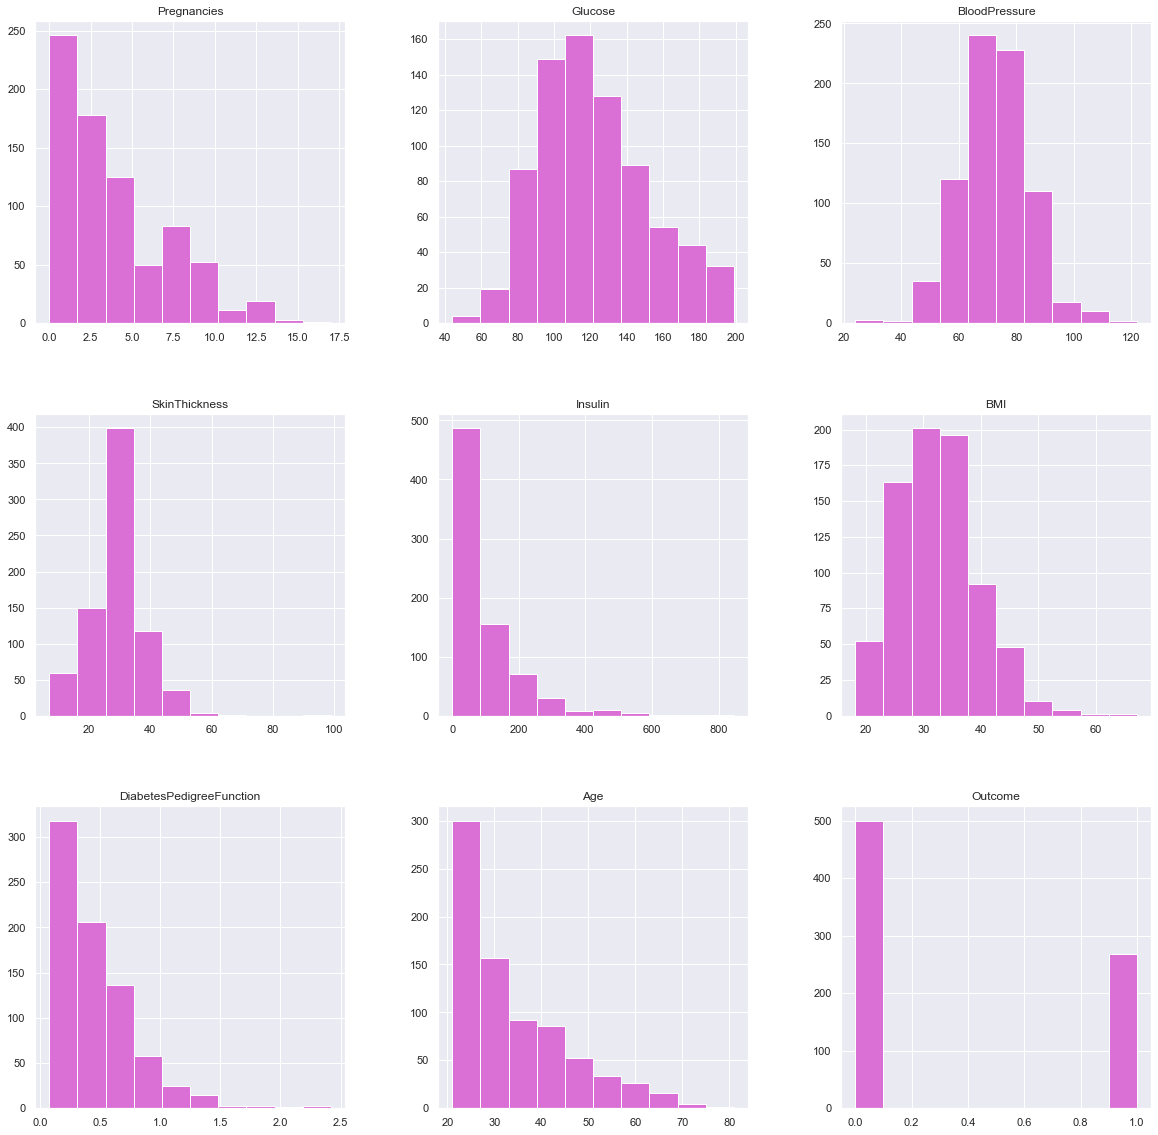

In [13]:
_ = diabetes_data.hist(figsize = (20,20),color = "orchid")

#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#diabetes_data.hist(ax = ax,color = "orchid")

Clearly here any one factor does not heavy too much on the detection of diabetes, Hence we need to move along with feature crosses and analyze.

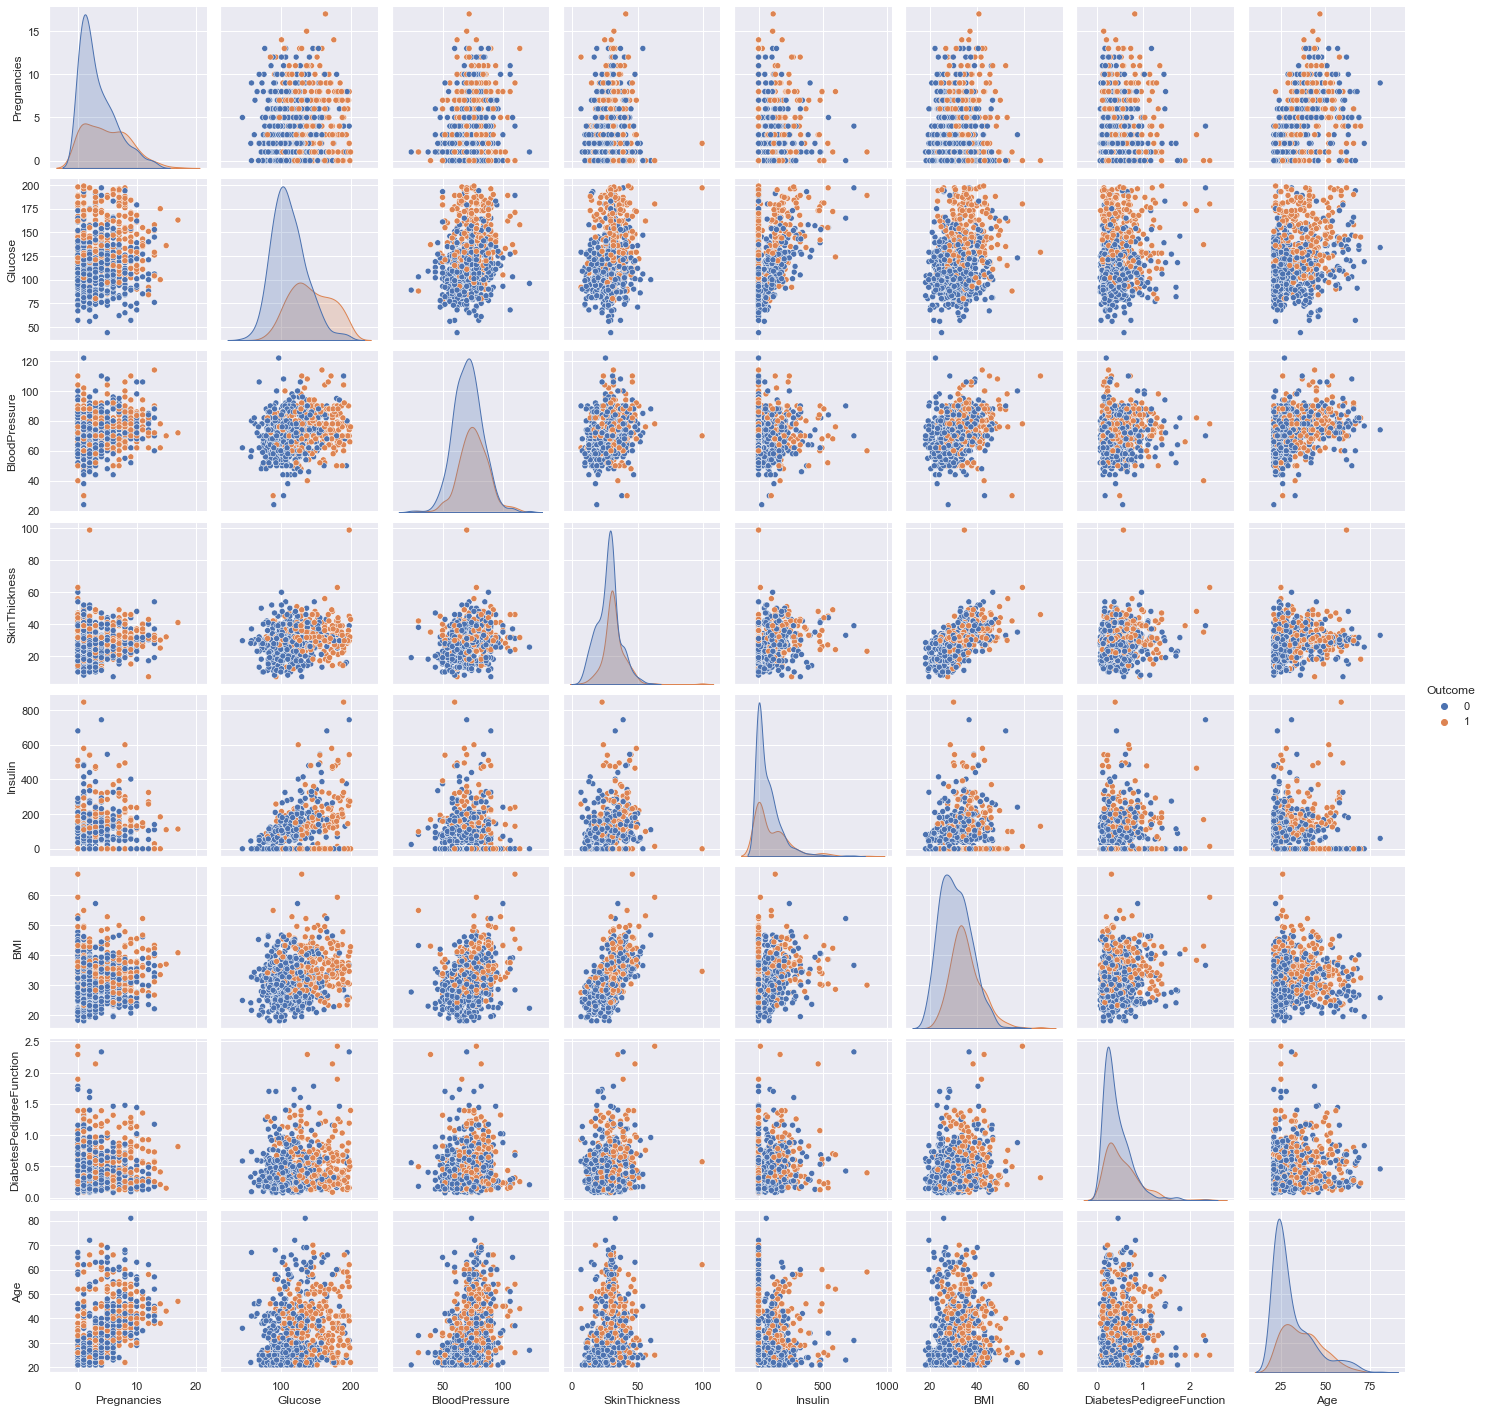

In [14]:
sns.pairplot(diabetes_data,hue='Outcome')

<AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>

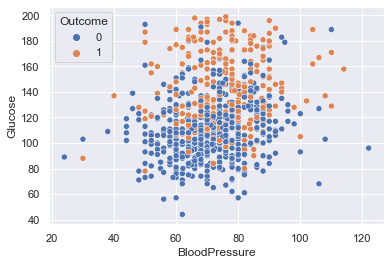

In [15]:
sns.scatterplot(x=diabetes_data['BloodPressure'],y=diabetes_data['Glucose'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>

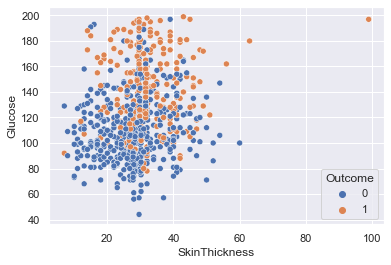

In [16]:
sns.scatterplot(x=diabetes_data['SkinThickness'],y=diabetes_data['Glucose'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

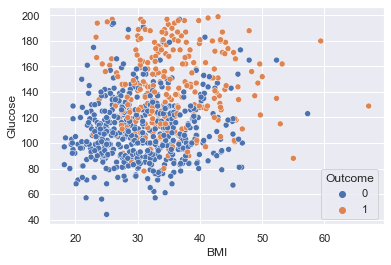

In [17]:
sns.scatterplot(x=diabetes_data['BMI'],y=diabetes_data['Glucose'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

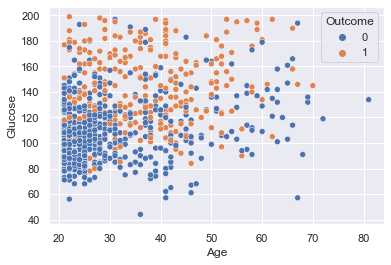

In [18]:
sns.scatterplot(x=diabetes_data['Age'],y=diabetes_data['Glucose'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

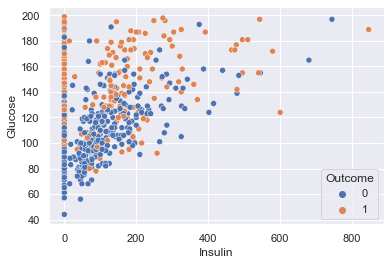

In [19]:
sns.scatterplot(x=diabetes_data['Insulin'],y=diabetes_data['Glucose'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Insulin', ylabel='BloodPressure'>

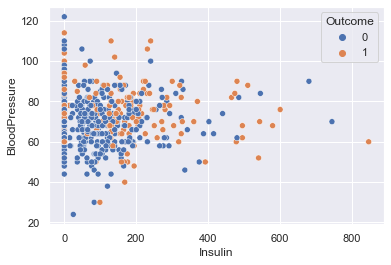

In [20]:
sns.scatterplot(x=diabetes_data['Insulin'],y=diabetes_data['BloodPressure'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

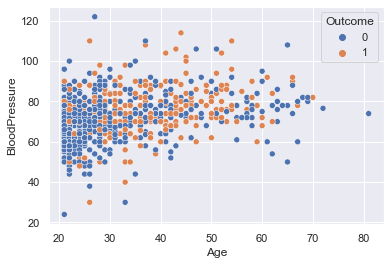

In [21]:
sns.scatterplot(x=diabetes_data['Age'],y=diabetes_data['BloodPressure'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

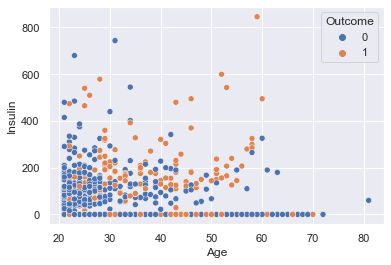

In [22]:
sns.scatterplot(x=diabetes_data['Age'],y=diabetes_data['Insulin'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='Age'>

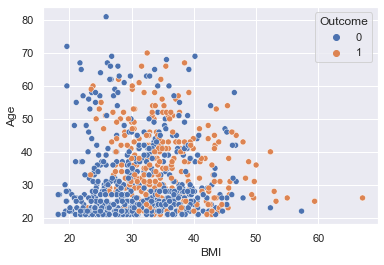

In [23]:
sns.scatterplot(x=diabetes_data['BMI'],y=diabetes_data['Age'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='SkinThickness'>

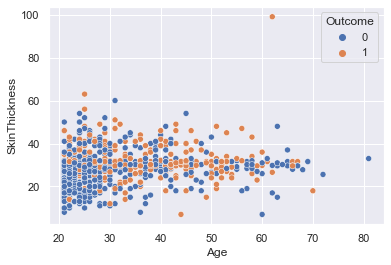

In [24]:
sns.scatterplot(x=diabetes_data['Age'],y=diabetes_data['SkinThickness'],hue=diabetes_data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

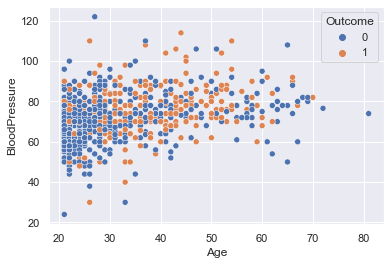

In [25]:
sns.scatterplot(x=diabetes_data['Age'],y=diabetes_data['BloodPressure'],hue=diabetes_data['Outcome'])

* There is no real relationship between age and diabetes
* There is no real relationship between pedigree and onset diabetes.CAn I conclude diabetes is not hereditary, or that the Diabetes Pedigree needs work

#### Plot the correlation matrix heatmap

In [26]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126914,0.211684,0.093002,-0.073535,0.023690,-0.033523,0.544341,0.221898
Glucose,0.126914,1.000000,0.227117,0.217263,0.330120,0.235493,0.136455,0.265246,0.492140
BloodPressure,0.211684,0.227117,1.000000,0.207160,-0.051094,0.299514,-0.000099,0.326034,0.180711
SkinThickness,0.093002,0.217263,0.207160,1.000000,0.106287,0.567721,0.106984,0.144717,0.236095
Insulin,-0.073535,0.330120,-0.051094,0.106287,1.000000,0.186102,0.185071,-0.042163,0.130548
BMI,0.023690,0.235493,0.299514,0.567721,0.186102,1.000000,0.154245,0.035017,0.314782
DiabetesPedigreeFunction,-0.033523,0.136455,-0.000099,0.106984,0.185071,0.154245,1.000000,0.033561,0.173844
Age,0.544341,0.265246,0.326034,0.144717,-0.042163,0.035017,0.033561,1.000000,0.238356
Outcome,0.221898,0.492140,0.180711,0.236095,0.130548,0.314782,0.173844,0.238356,1.000000


Correlation between various features


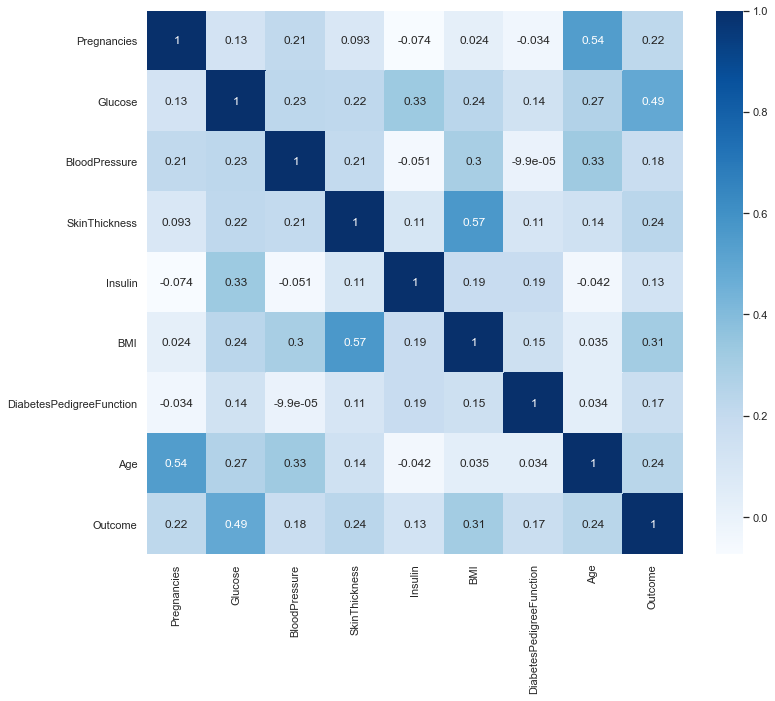

In [27]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

* Glucose levels had the highest effect on the outcome.
* Pregnancies were correlated to age.



<AxesSubplot:xlabel='Outcome', ylabel='count'>

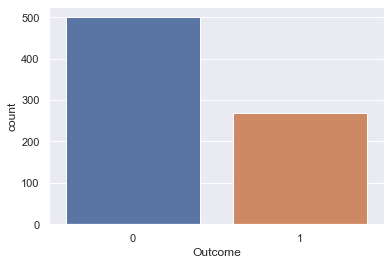

In [28]:
sns.countplot(x=diabetes_data.Outcome)

dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

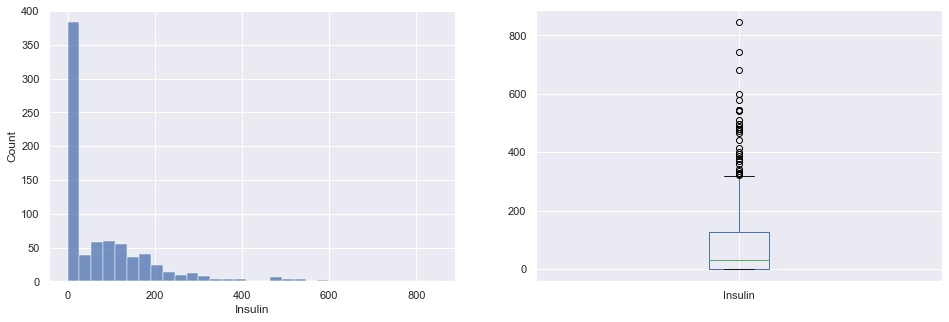

In [29]:
plt.subplot(121), sns.histplot(diabetes_data['Insulin'])
plt.subplot(122), diabetes_data['Insulin'].plot.box(figsize=(16,5))
plt.show()

Looks many are not on Insulin

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [30]:
y = diabetes_data.Outcome
X = diabetes_data.drop('Outcome', axis = 1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

he KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [33]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [34]:
for i in range(0,10):
    print("for K = {} - Train Score: {}, Test Score: {}".format(i,train_scores[i-1],test_scores[i-1]))

for K = 0 - Train Score: 0.819366852886406, Test Score: 0.7229437229437229
for K = 1 - Train Score: 1.0, Test Score: 0.6320346320346321
for K = 2 - Train Score: 0.8603351955307262, Test Score: 0.6623376623376623
for K = 3 - Train Score: 0.8547486033519553, Test Score: 0.70995670995671
for K = 4 - Train Score: 0.8249534450651769, Test Score: 0.6883116883116883
for K = 5 - Train Score: 0.8286778398510242, Test Score: 0.7272727272727273
for K = 6 - Train Score: 0.8230912476722533, Test Score: 0.7056277056277056
for K = 7 - Train Score: 0.8491620111731844, Test Score: 0.7272727272727273
for K = 8 - Train Score: 0.8324022346368715, Test Score: 0.7186147186147186
for K = 9 - Train Score: 0.819366852886406, Test Score: 0.7229437229437229


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [35]:
max_train_score = max(train_scores)
train_score_index = train_scores.index(max_train_score) + 1
print("Max train score is {}  for k = {}".format(max_train_score,train_score_index))

Max train score is 1.0  for k = 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [36]:
max_test_score = max(test_scores)
test_score_index = test_scores.index(max_test_score) + 1
print("Max test score is {}  for k = {}".format(max_test_score,test_score_index))

Max test score is 0.7272727272727273  for k = 5


Plot the train and test model performance by number of neighbors.

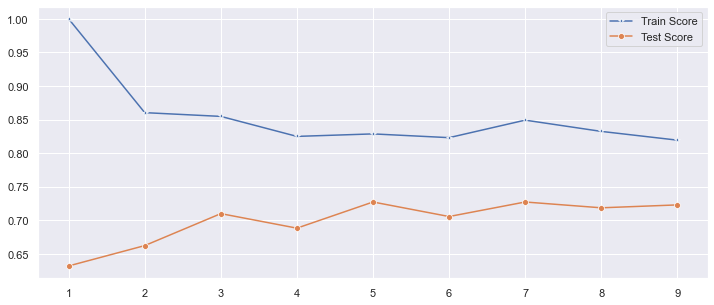

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x =range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [38]:
# knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

#Fit the model
knn.fit(X_train,y_train)
#test score 
knn.score(X_test, y_test)

0.7186147186147186

In [39]:
y_pred = knn.predict(X_test)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

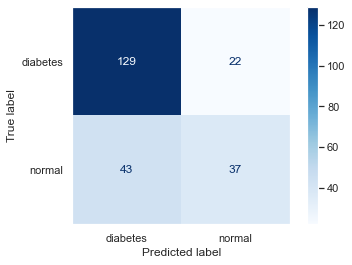

In [40]:
plot_CM(y_test,y_pred)

**<font color='teal'> Print the classification report </font>**

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       151
           1       0.63      0.46      0.53        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [43]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578728461081402
Best Parameters: {'n_neighbors': 34}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

Further improvement on accuracy can be done using bagging and boosting techniques.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [44]:
# Import module
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
RFclf = RandomForestClassifier()

# Define parameter grid
param_grid = {'n_estimators':np.arange(1,100), 'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,5)}

# Instantiate the GridSearchCV
Ranforest_cv = GridSearchCV(RFclf, param_grid, cv=5)

# Fit training data
Ranforest_cv.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [45]:
print("Best Score:" + str(Ranforest_cv.best_score_))
print("Best Parameters: " + str(Ranforest_cv.best_params_))

Best Score:0.7728106611284181
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 19}


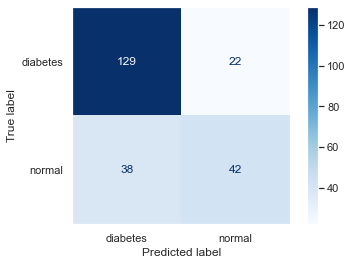

In [46]:
y_pred_rf = Ranforest_cv.predict(X_test)
plot_CM(y_test,y_pred_rf)

In [47]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       151
           1       0.66      0.53      0.58        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



Recall and presicion is improved , model is better than Knn. Same can be seen in decline of False -ve and False +ve from confusion matrix.

#### Finding feature importance for random forest

<AxesSubplot:>

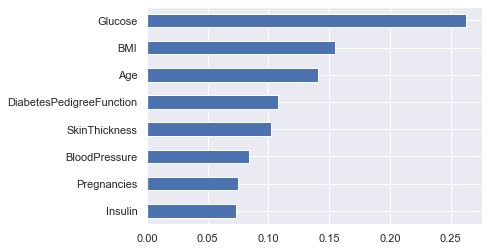

In [48]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc.feature_importances_
pd.Series(rfc.feature_importances_, index=X.columns).sort_values().plot(kind='barh')

Glucose as a feature is the most important in this dataset.

In [49]:
#save the model
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
 diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.6,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


Let me take 2nd patient data and predict

In [51]:
rfc.predict([[8,183,64,0,0,23.3,0.672,32]])

array([1], dtype=int64)

Prediction came as 1. same as the data.

#### With Neural Network

In [52]:
from keras.models import Sequential
from keras.layers import Dense #, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [53]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    
# Adding the second hidden layer
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/1000
36/36 [==============================] - 1s 9ms/step - loss: 0.2489 - accuracy: 0.6108 - val_loss: 0.2475 - val_accuracy: 0.6537
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.6499 - val_loss: 0.2429 - val_accuracy: 0.6537
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.6499 - val_loss: 0.2345 - val_accuracy: 0.6537
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.6499 - val_loss: 0.2208 - val_accuracy: 0.6537
Epoch 5/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.6499 - val_loss: 0.2059 - val_accuracy: 0.6537
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.6536 - val_loss: 0.1933 - val_accuracy: 0.6494
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.7095 - val_loss: 0.1858 - val_accuracy: 0.7619
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.7952 - val_loss: 0.1740 - val_accuracy: 0.7403
Epoch 59/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.7952 - val_loss: 0.1743 - val_accuracy: 0.7359
Epoch 60/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.7952 - val_loss: 0.1746 - val_accuracy: 0.7403
Epoch 61/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1400 - accuracy: 0.7933 - val_loss: 0.1747 - val_accuracy: 0.7359
Epoch 62/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.7933 - val_loss: 0.1744 - val_accuracy: 0.7403
Epoch 63/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.7970 - val_loss: 0.1743 - val_accuracy: 0.7446
Epoch 64/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.7933 - val_loss: 0.1748 - val_accuracy: 0.7403
Epoch 65/1000

36/36 [==============================] - 0s 5ms/step - loss: 0.1384 - accuracy: 0.8063 - val_loss: 0.1755 - val_accuracy: 0.7489
Epoch 116/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.8063 - val_loss: 0.1758 - val_accuracy: 0.7489
Epoch 117/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.8045 - val_loss: 0.1755 - val_accuracy: 0.7489
Epoch 118/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.8045 - val_loss: 0.1754 - val_accuracy: 0.7489
Epoch 119/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.8063 - val_loss: 0.1755 - val_accuracy: 0.7446
Epoch 120/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.8045 - val_loss: 0.1756 - val_accuracy: 0.7489
Epoch 121/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.8045 - val_loss: 0.1756 - val_accuracy: 0.7489
Epoch 1

Epoch 172/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.8101 - val_loss: 0.1765 - val_accuracy: 0.7446
Epoch 173/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1369 - accuracy: 0.8082 - val_loss: 0.1768 - val_accuracy: 0.7446
Epoch 174/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.8082 - val_loss: 0.1770 - val_accuracy: 0.7446
Epoch 175/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.8101 - val_loss: 0.1766 - val_accuracy: 0.7446
Epoch 176/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.8063 - val_loss: 0.1759 - val_accuracy: 0.7359
Epoch 177/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1367 - accuracy: 0.8063 - val_loss: 0.1766 - val_accuracy: 0.7403
Epoch 178/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.8045 - val_loss: 0.1765 - val_accuracy:

Epoch 229/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.8119 - val_loss: 0.1752 - val_accuracy: 0.7273
Epoch 230/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.8101 - val_loss: 0.1758 - val_accuracy: 0.7229
Epoch 231/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.8101 - val_loss: 0.1759 - val_accuracy: 0.7229
Epoch 232/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.8101 - val_loss: 0.1760 - val_accuracy: 0.7229
Epoch 233/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.8119 - val_loss: 0.1756 - val_accuracy: 0.7229
Epoch 234/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.8101 - val_loss: 0.1757 - val_accuracy: 0.7229
Epoch 235/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.8119 - val_loss: 0.1761 - val_accuracy:

Epoch 286/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.8156 - val_loss: 0.1741 - val_accuracy: 0.7359
Epoch 287/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.8119 - val_loss: 0.1740 - val_accuracy: 0.7359
Epoch 288/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.8138 - val_loss: 0.1737 - val_accuracy: 0.7403
Epoch 289/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8138 - val_loss: 0.1740 - val_accuracy: 0.7359
Epoch 290/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8156 - val_loss: 0.1747 - val_accuracy: 0.7359
Epoch 291/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1332 - accuracy: 0.8175 - val_loss: 0.1736 - val_accuracy: 0.7359
Epoch 292/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.8138 - val_loss: 0.1735 - val_accuracy:

Epoch 343/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.8231 - val_loss: 0.1736 - val_accuracy: 0.7446
Epoch 344/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1314 - accuracy: 0.8194 - val_loss: 0.1737 - val_accuracy: 0.7446
Epoch 345/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.8194 - val_loss: 0.1738 - val_accuracy: 0.7446
Epoch 346/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.8212 - val_loss: 0.1738 - val_accuracy: 0.7446
Epoch 347/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.8212 - val_loss: 0.1743 - val_accuracy: 0.7446
Epoch 348/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1314 - accuracy: 0.8194 - val_loss: 0.1745 - val_accuracy: 0.7446
Epoch 349/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.8156 - val_loss: 0.1738 - val_accuracy:

Epoch 400/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.8194 - val_loss: 0.1750 - val_accuracy: 0.7532
Epoch 401/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.8212 - val_loss: 0.1747 - val_accuracy: 0.7532
Epoch 402/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.8212 - val_loss: 0.1750 - val_accuracy: 0.7489
Epoch 403/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.8212 - val_loss: 0.1752 - val_accuracy: 0.7489
Epoch 404/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.8212 - val_loss: 0.1758 - val_accuracy: 0.7532
Epoch 405/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.8212 - val_loss: 0.1750 - val_accuracy: 0.7532
Epoch 406/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.8175 - val_loss: 0.1744 - val_accuracy:

Epoch 457/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.8212 - val_loss: 0.1746 - val_accuracy: 0.7446
Epoch 458/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.8212 - val_loss: 0.1743 - val_accuracy: 0.7446
Epoch 459/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1289 - accuracy: 0.8175 - val_loss: 0.1743 - val_accuracy: 0.7446
Epoch 460/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.8194 - val_loss: 0.1740 - val_accuracy: 0.7446
Epoch 461/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.8175 - val_loss: 0.1742 - val_accuracy: 0.7446
Epoch 462/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.8156 - val_loss: 0.1744 - val_accuracy: 0.7403
Epoch 463/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1290 - accuracy: 0.8175 - val_loss: 0.1746 - val_accuracy:

Epoch 514/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.8212 - val_loss: 0.1725 - val_accuracy: 0.7403
Epoch 515/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.8231 - val_loss: 0.1729 - val_accuracy: 0.7446
Epoch 516/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1267 - accuracy: 0.8231 - val_loss: 0.1731 - val_accuracy: 0.7446
Epoch 517/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.8231 - val_loss: 0.1729 - val_accuracy: 0.7446
Epoch 518/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.8250 - val_loss: 0.1728 - val_accuracy: 0.7446
Epoch 519/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.8231 - val_loss: 0.1725 - val_accuracy: 0.7446
Epoch 520/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.8212 - val_loss: 0.1732 - val_accuracy:

Epoch 571/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.8194 - val_loss: 0.1720 - val_accuracy: 0.7316
Epoch 572/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.8194 - val_loss: 0.1717 - val_accuracy: 0.7316
Epoch 573/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1252 - accuracy: 0.8212 - val_loss: 0.1720 - val_accuracy: 0.7316
Epoch 574/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.8194 - val_loss: 0.1722 - val_accuracy: 0.7316
Epoch 575/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.8156 - val_loss: 0.1721 - val_accuracy: 0.7403
Epoch 576/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.8194 - val_loss: 0.1727 - val_accuracy: 0.7273
Epoch 577/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.8212 - val_loss: 0.1723 - val_accuracy:

36/36 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.8175 - val_loss: 0.1728 - val_accuracy: 0.7359
Epoch 628/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.8194 - val_loss: 0.1731 - val_accuracy: 0.7359
Epoch 629/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1248 - accuracy: 0.8231 - val_loss: 0.1729 - val_accuracy: 0.7316
Epoch 630/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.8175 - val_loss: 0.1729 - val_accuracy: 0.7359
Epoch 631/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.8175 - val_loss: 0.1729 - val_accuracy: 0.7359
Epoch 632/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.8231 - val_loss: 0.1730 - val_accuracy: 0.7359
Epoch 633/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.8212 - val_loss: 0.1732 - val_accuracy: 0.7316
Epoch 6

Epoch 684/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.8212 - val_loss: 0.1730 - val_accuracy: 0.7359
Epoch 685/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8156 - val_loss: 0.1727 - val_accuracy: 0.7446
Epoch 686/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8194 - val_loss: 0.1727 - val_accuracy: 0.7403
Epoch 687/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.8194 - val_loss: 0.1727 - val_accuracy: 0.7446
Epoch 688/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.8175 - val_loss: 0.1730 - val_accuracy: 0.7446
Epoch 689/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.8175 - val_loss: 0.1729 - val_accuracy: 0.7359
Epoch 690/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.8175 - val_loss: 0.1725 - val_accuracy:

Epoch 741/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.8212 - val_loss: 0.1731 - val_accuracy: 0.7403
Epoch 742/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.8231 - val_loss: 0.1735 - val_accuracy: 0.7359
Epoch 743/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.8156 - val_loss: 0.1731 - val_accuracy: 0.7403
Epoch 744/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.8231 - val_loss: 0.1728 - val_accuracy: 0.7359
Epoch 745/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.8156 - val_loss: 0.1735 - val_accuracy: 0.7359
Epoch 746/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.8175 - val_loss: 0.1733 - val_accuracy: 0.7446
Epoch 747/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8194 - val_loss: 0.1728 - val_accuracy:

Epoch 798/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8175 - val_loss: 0.1736 - val_accuracy: 0.7403
Epoch 799/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.8194 - val_loss: 0.1733 - val_accuracy: 0.7403
Epoch 800/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.8212 - val_loss: 0.1737 - val_accuracy: 0.7403
Epoch 801/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8212 - val_loss: 0.1736 - val_accuracy: 0.7359
Epoch 802/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8194 - val_loss: 0.1733 - val_accuracy: 0.7403
Epoch 803/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.8212 - val_loss: 0.1735 - val_accuracy: 0.7489
Epoch 804/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8175 - val_loss: 0.1735 - val_accuracy:

Epoch 855/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.8194 - val_loss: 0.1736 - val_accuracy: 0.7403
Epoch 856/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.8212 - val_loss: 0.1737 - val_accuracy: 0.7446
Epoch 857/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8212 - val_loss: 0.1736 - val_accuracy: 0.7446
Epoch 858/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.8156 - val_loss: 0.1736 - val_accuracy: 0.7359
Epoch 859/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8194 - val_loss: 0.1740 - val_accuracy: 0.7446
Epoch 860/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.8212 - val_loss: 0.1734 - val_accuracy: 0.7446
Epoch 861/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8194 - val_loss: 0.1734 - val_accuracy:

Epoch 912/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.8194 - val_loss: 0.1739 - val_accuracy: 0.7446
Epoch 913/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1244 - accuracy: 0.8212 - val_loss: 0.1738 - val_accuracy: 0.7446
Epoch 914/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.8175 - val_loss: 0.1744 - val_accuracy: 0.7403
Epoch 915/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8138 - val_loss: 0.1740 - val_accuracy: 0.7403
Epoch 916/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.8194 - val_loss: 0.1739 - val_accuracy: 0.7403
Epoch 917/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8231 - val_loss: 0.1737 - val_accuracy: 0.7403
Epoch 918/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.8212 - val_loss: 0.1739 - val_accuracy:

36/36 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.8175 - val_loss: 0.1749 - val_accuracy: 0.7359
Epoch 969/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.8194 - val_loss: 0.1744 - val_accuracy: 0.7403
Epoch 970/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1236 - accuracy: 0.8175 - val_loss: 0.1745 - val_accuracy: 0.7403
Epoch 971/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8175 - val_loss: 0.1744 - val_accuracy: 0.7359
Epoch 972/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.8194 - val_loss: 0.1748 - val_accuracy: 0.7359
Epoch 973/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.8194 - val_loss: 0.1747 - val_accuracy: 0.7359
Epoch 974/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.8194 - val_loss: 0.1743 - val_accuracy: 0.7359
Epoch 9

In [56]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) 
accuracy_score(y_test, y_pred)

0.6536796536796536

In [57]:
confusion_matrix(y_test, y_pred)

array([[151,   0],
       [ 80,   0]], dtype=int64)

In [58]:
print(model.metrics_names)

['loss', 'accuracy']


In [59]:
#The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


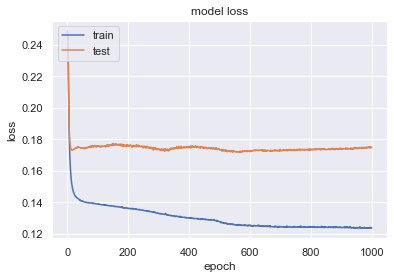

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

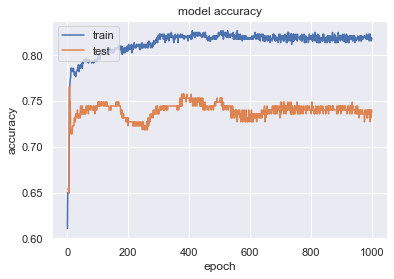

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model
Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

This includes all - means below ones:

    Model weights.
    Model architecture.
    Model compilation details (loss and metrics).
    Model optimizer state.

This means that we can load and use the model directly, without having to re-compile it.

In [62]:
model.save('model.h5')

In [63]:
from keras.models import load_model

In [64]:
#load the model
model = load_model('model.h5')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Making predictions
print(model.predict(np.array([8,183,64,0,0,23.3,0.672,32]).reshape((1,8))))

[[1.]]


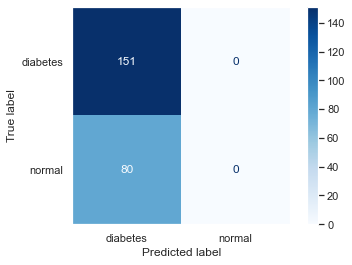

In [67]:
plot_CM(y_test,y_pred)

In [68]:
print(classification_report(y_test,y_pred,zero_division =1))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       1.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.83      0.50      0.40       231
weighted avg       0.77      0.65      0.52       231



NN classifier could predict majority claseses correctly, but not on with monority. it is predicting non-defaults as defaults. Patients with diabetes are predicted as no diabetes.